In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Load the images from the dataset (1000 images, 10 different classes)
from imutils import paths
from google.colab.patches import cv2_imshow
import os, cv2
import numpy as np
import pandas as pd

# List of paths 
file_list=[]
file_list.append(os.listdir(r"/content/drive/MyDrive/flower_photos/daisy"))
file_list.append(os.listdir(r"/content/drive/MyDrive/flower_photos/dandelion"))
file_list.append(os.listdir(r"/content/drive/MyDrive/flower_photos/roses"))
file_list.append(os.listdir(r"/content/drive/MyDrive/flower_photos/sunflowers"))
file_list.append(os.listdir(r"/content/drive/MyDrive/flower_photos/tulips"))

# general path
path='/content/drive/MyDrive/flower_photos/'

# list of classes
class_names=['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips'] 
#class_names=['dogs', 'cats']
#image_name = ['dog', 'cat']

X = []
y = []

# Feature extraction
for c in range(5):
    for i in range(633):
      name= str(path) + str(class_names[c]) + str('/') + str(class_names[c]) + str(i) + str('.jpg') 
      print(name)
      imagem = cv2.imread(name)
      imagem = cv2.resize(imagem,(120,120))  #### <=====
      
      print(imagem.shape)
      altura, largura, _ = imagem.shape
      img = np.asarray(imagem)
      y.append(c)      
      X.append(img)

# Saving the extracted features (deep) in a csv file
np.save('X', X)

# Saving the classes in a csv file
df_class = pd.DataFrame(y)
df_class.to_csv('y.csv', header=False, index=False)


Streaming output truncated to the last 5000 lines.
/content/drive/MyDrive/flower_photos/dandelion/dandelion32.jpg
(120, 120, 3)
/content/drive/MyDrive/flower_photos/dandelion/dandelion33.jpg
(120, 120, 3)
/content/drive/MyDrive/flower_photos/dandelion/dandelion34.jpg
(120, 120, 3)
/content/drive/MyDrive/flower_photos/dandelion/dandelion35.jpg
(120, 120, 3)
/content/drive/MyDrive/flower_photos/dandelion/dandelion36.jpg
(120, 120, 3)
/content/drive/MyDrive/flower_photos/dandelion/dandelion37.jpg
(120, 120, 3)
/content/drive/MyDrive/flower_photos/dandelion/dandelion38.jpg
(120, 120, 3)
/content/drive/MyDrive/flower_photos/dandelion/dandelion39.jpg
(120, 120, 3)
/content/drive/MyDrive/flower_photos/dandelion/dandelion40.jpg
(120, 120, 3)
/content/drive/MyDrive/flower_photos/dandelion/dandelion41.jpg
(120, 120, 3)
/content/drive/MyDrive/flower_photos/dandelion/dandelion42.jpg
(120, 120, 3)
/content/drive/MyDrive/flower_photos/dandelion/dandelion43.jpg
(120, 120, 3)
/content/drive/MyDrive/fl

In [3]:
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, BatchNormalization
from keras.callbacks import EarlyStopping
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dropout

from keras import regularizers
import keras

# define cnn model
def define_model(img_size=120):
	batch_size=128
	weight_decay=1e-4
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(weight_decay), kernel_initializer='he_uniform', padding='same', input_shape=(img_size, img_size, 3)))
#	model.add(MaxPooling2D((2, 2)))
	model.add(BatchNormalization())
	model.add(Dropout(0.2))
 
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(weight_decay), kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(BatchNormalization())
	model.add(Dropout(0.3))

	model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(weight_decay), kernel_initializer='he_uniform', padding='same'))
#	model.add(MaxPooling2D((2, 2)))
	model.add(BatchNormalization())
	model.add(Dropout(0.4))

	model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(weight_decay), kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(BatchNormalization())
	model.add(Dropout(0.5))

#	model.add(Conv2D(512, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(weight_decay), kernel_initializer='he_uniform', padding='same'))
#	model.add(MaxPooling2D((2, 2)))
#	model.add(BatchNormalization())
#	model.add(Dropout(0.6))

	model.add(Flatten())
#	model.add(Dense(4096, activation='relu'))
	model.add(Dropout(0.7))
	model.add(Dense(5, activation='softmax'))
	# compile model
	model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=['accuracy'])
	#opt = SGD(lr=0.001, momentum=0.3)
	#model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model
  


In [4]:
# scale pixels
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm

In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split


#model.fit para executar treinamento
model=define_model()
model.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 120, 120, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 120, 120, 32)      128       
_________________________________________________________________
dropout (Dropout)            (None, 120, 120, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 120, 120, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 60, 60, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 60, 60, 32)        128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 60, 32)        0

In [6]:

# Load the images and the corresponding labels
y = pd.read_csv('y.csv', header=None)
y=y.to_numpy()
y=np.ravel(y)
print(y.shape)

X=np.load('X.npy')
print(X.shape)

# Holdout -> dividindo a base em treinamento (70%) e teste (30%), estratificada
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.3, random_state=42, stratify=y)

# Data normalization
trainX, testX = prep_pixels(X_train, X_test)

# Preparing the labels
trainY = to_categorical(y_train)
testY = to_categorical(y_test)
print(testY.shape)


print(trainX.shape)
print(testX.shape)


(3165,)
(3165, 120, 120, 3)
(950, 5)
(2215, 120, 120, 3)
(950, 120, 120, 3)


Epoch 1/100
14/14 [==============================] - 3s 167ms/step - loss: 1.0363 - accuracy: 0.6670 - val_loss: 1.2024 - val_accuracy: 0.5282
Epoch 2/100
14/14 [==============================] - 2s 165ms/step - loss: 1.0006 - accuracy: 0.6749 - val_loss: 1.3147 - val_accuracy: 0.5124
Epoch 3/100
14/14 [==============================] - 2s 164ms/step - loss: 1.0244 - accuracy: 0.6648 - val_loss: 1.2564 - val_accuracy: 0.5034
Epoch 4/100
14/14 [==============================] - 2s 165ms/step - loss: 1.0429 - accuracy: 0.6541 - val_loss: 1.3321 - val_accuracy: 0.4898
Epoch 5/100
14/14 [==============================] - 2s 166ms/step - loss: 1.0281 - accuracy: 0.6749 - val_loss: 1.4491 - val_accuracy: 0.4447
Epoch 6/100
14/14 [==============================] - 2s 166ms/step - loss: 0.9454 - accuracy: 0.6738 - val_loss: 1.3903 - val_accuracy: 0.4537
Epoch 7/100
14/14 [==============================] - 2s 165ms/step - loss: 0.9806 - accuracy: 0.6721 - val_loss: 1.3246 - val_accuracy: 0.4831

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Text(0.5, 0, 'Classes reais')

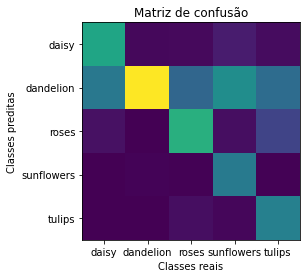

In [33]:

es = EarlyStopping(monitor='val_loss', mode='min', verbose=0)
results = model.fit(trainX, trainY, 
          batch_size=128,
          epochs=100,
          verbose=1,
          #validation_data=(x_test, y_test))
          validation_split=0.2)
          #callbacks=[es])

_, acc = model.evaluate(testX, testY, verbose=0)
print('> %.3f' % (acc * 100.0))


#matriz de confusao
import keras
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

predictY= model.predict_classes(testX)
mc= confusion_matrix(predictY, np.argmax(testY, axis= 1))
mc_labels= ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips'] 
plt.imshow(mc, interpolation= 'nearest')
plt.title('Matriz de confusão')
tick_marks = np.arange(len(mc_labels))
plt.xticks(tick_marks, mc_labels)

plt.yticks(tick_marks, mc_labels)
plt.ylabel('Classes preditas')
plt.xlabel('Classes reais')


In [31]:
# plot diagnostic learning curves
def summarize_diagnostics(history):
	# plot loss
	pyplot.subplot(211)
	pyplot.title('Cross Entropy Loss')
	pyplot.plot(history.history['loss'], color='blue', label='train')
	pyplot.plot(history.history['val_loss'], color='orange', label='test')
	# plot accuracy
	pyplot.subplot(212)
	pyplot.title('Classification Accuracy')
	pyplot.plot(history.history['accuracy'], color='blue', label='train')
	pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
	# save plot to file
	filename = sys.argv[0].split('/')[-1]
	#pyplot.savefig(filename + '_plot.png')
	#pyplot.close()
	pyplot.show()

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
17/17 [==============================] - 8s 435ms/step - loss: 5.0980 - accuracy: 0.3146 - val_loss: 1.9088 - val_accuracy: 0.3347
Epoch 2/100
17/17 [==============================] - 7s 419ms/step - loss: 4.2788 - accuracy: 0.4012 - val_loss: 2.9814 - val_accuracy: 0.2979
Epoch 3/100
17/17 [==============================] - 7s 420ms/step - loss: 4.4974 - accuracy: 0.4308 - val_loss: 7.5345 - val_accuracy: 0.2253
Epoch 4/100
17/17 [==============================] - 7s 423ms/step - loss: 4.5636 - accuracy: 0.4501 - val_loss: 7.9571 - val_accuracy: 0.2074
Epoch 5/100
17/17 [==============================] - 7s 428ms/step - loss: 4.9085 - accuracy: 0.4680 - val_loss: 5.6313 - val_accuracy: 0.2611
Epoch 6/100
17/17 [==============================] - 7s 427ms/step - loss: 5.2593 - accuracy: 0.4405 - val_loss: 15.2334 - val_accuracy: 0.2042
Epoch 7/100
17/17 [==============================] - 7s 423ms/step - loss: 5.5458 - accuracy: 0.4374 - val_loss: 9.8882 - val_accuracy: 0.245

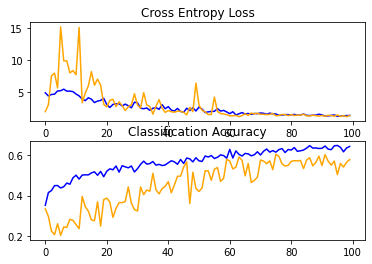

In [35]:
# define model
model = define_model()
# create data generator
datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)

# Apply the generator
datagen.fit(trainX)

# prepare iterator
it_train = datagen.flow(trainX, trainY, batch_size=128)
# fit model
steps = int(trainX.shape[0] / 128)
history = model.fit_generator(it_train, steps_per_epoch=len(trainX) / 128, epochs=100, validation_data=(testX, testY), verbose=1)
# evaluate model
_, acc = model.evaluate(testX, testY, verbose=0)
print('> %.3f' % (acc * 100.0))
# learning curves
summarize_diagnostics(history)


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


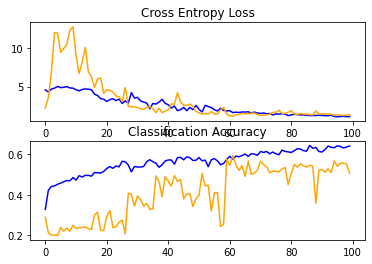

In [32]:
# list all data in history
print(history.history.keys())
summarize_diagnostics(history)